In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('D:\\Ml dataset\\Cust_Spend_Data_New.csv')


In [4]:
data.head(3)


,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2


In [5]:
data.isnull().sum()


Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [6]:
data.duplicated().sum()


0

In [7]:
df= data.drop(['Cust_ID', 'Name'], axis= 1)


In [8]:
df.head()


,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [45]:
from sklearn.preprocessing import StandardScaler


In [10]:
SC=  StandardScaler()


In [11]:
std_data=SC.fit_transform(df)


In [12]:
std_data

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

In [37]:
pip install --upgrade scikit-learn threadpoolctl


Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.cluster import KMeans


In [41]:
kmean1=KMeans(n_clusters=1)


In [42]:
kmean1.fit(std_data)


AttributeError: 'NoneType' object has no attribute 'split'

In [43]:
kmean2=KMeans(n_clusters=2)
kmean2.fit(std_data)
kmean2.inertia_

2225.8180780994676

In [44]:
Wss=[]

In [ ]:
for i in range(2,11):
    kmeani=KMeans(n_clusters=i)
    kmeani.fit(std_data)
    Wss.append(kmeani.inertia_)

In [19]:
Wss

[2225.8180780994676,
 1074.382380298951,
 909.4495242917949,
 784.5887748781103,
 697.7964308882449,
 628.7560345935308,
 585.0941636266658,
 539.8119504455569,
 509.543049126306]

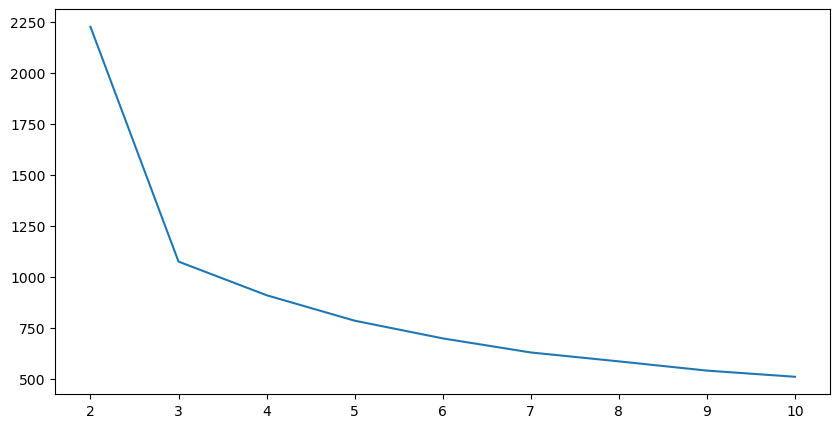

In [20]:
plt.figure(figsize=(10,5))
plt.plot(range(2,11), Wss)

In [21]:
#we decided to go for 3 clusters

In [22]:
kmean3=KMeans(n_clusters=3)
kmean3.fit(std_data)
Labels=kmean3.labels_

In [23]:
Labels


array([2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0,
       0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1,
       1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0,

In [24]:
data['cluster']=Labels


In [25]:
data.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,1,Abraham,1123,28,1,16,14,2
1,2,Adela,9818,13,5,2,5,1
2,3,Adelina,9824,10,10,2,2,1
3,4,Adrian,3097,23,2,8,9,0
4,5,Adrianna,817,28,1,17,17,2


In [26]:
pivot=pd.pivot_table(data,index='cluster')

In [27]:
pivot

,Apparel_Items,Avg_Mthly_Spend,Cust_ID,FnV_Items,No_Of_Visits,Staples_Items
cluster,,,,,,
0,3.787671,4486.681507,518.297945,7.351027,17.779110,8.030822
1,6.935252,8604.834532,181.323741,3.071942,12.446043,3.244604
2,1.018868,1546.830189,152.311321,15.094340,25.377358,16.716981


In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [29]:
silhouette_width=silhouette_samples(std_data, Labels)


In [30]:
silhouette_width

array([0.65605464, 0.51242446, 0.58238018, 0.37519676, 0.70316661,
       0.21533883, 0.40883241, 0.53016965, 0.36212368, 0.46435202,
       0.53273181, 0.38251421, 0.45638838, 0.54265228, 0.59946695,
       0.58742145, 0.70669699, 0.52804742, 0.50993649, 0.51621198,
       0.46439947, 0.45916516, 0.43727811, 0.66885372, 0.58985762,
       0.61143772, 0.29967741, 0.62514869, 0.64122086, 0.67914798,
       0.69348064, 0.41267202, 0.69288439, 0.0820282 , 0.67147334,
       0.65179887, 0.55169861, 0.19310875, 0.57929786, 0.66911281,
       0.54933109, 0.61843536, 0.64293749, 0.64770225, 0.61059923,
       0.42515881, 0.55014745, 0.62945221, 0.4170128 , 0.51390593,
       0.0763273 , 0.61962009, 0.07671105, 0.57562558, 0.47135448,
       0.49643811, 0.68152376, 0.6270269 , 0.37620108, 0.54238286,
       0.39114866, 0.65826701, 0.61888157, 0.62445611, 0.52587586,
       0.23652939, 0.30229326, 0.65941125, 0.67937278, 0.56388553,
       0.60899332, 0.58244297, 0.39735031, 0.4988705 , 0.65145

In [31]:
silhouette_width.min()

0.04131038567750352

In [32]:
silhouette_score(std_data,Labels)

0.5863370901372584

THE END